In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = 'dataset/filtered_train_14_23.csv'

In [3]:
df = pd.read_csv(file_path)
n_clusters = 30

Clusterin all the requests' pickpoints in n_clusters groups

In [4]:

coordinates_df = df[['pickup_longitude', 'pickup_latitude']]
# Use KMeans clustering with k=n_clusters to identify locations
kmeans_pickup = KMeans(n_clusters=n_clusters, random_state=42)
df['location_pickup'] = kmeans_pickup.fit_predict(coordinates_df)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
centroids_pickup = kmeans_pickup.cluster_centers_
# Get the labels assigned to each data point during clustering
labels_pickup = kmeans_pickup.labels_
# Initialize an empty dictionary to store clusters
clusters_pickup = {}

# Iterate over each centroid and its corresponding label
for idx, centroid in enumerate(centroids_pickup):
    label = idx  # Cluster label corresponds to centroid index
    # Find indices of data points assigned to this cluster
    cluster_indices = np.where(labels_pickup == label)[0]
    # Store cluster label and indices in the dictionary
    clusters_pickup[label] = cluster_indices


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


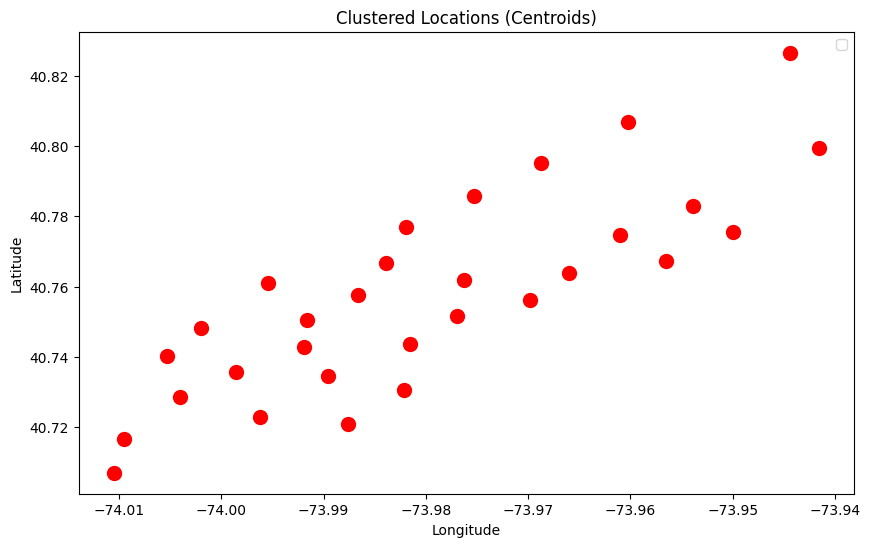

In [6]:
# Display information or perform further analysis on each location as needed
centroids_pickpup = kmeans_pickup.cluster_centers_

# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))
plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=100, c='red')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

Cluster the dropoff

In [7]:
# Select only the relevant columns
coordinates_df = df[['dropoff_longitude', 'dropoff_latitude']]
# Use KMeans clustering with k=100 to identify locations
kmeans_dropoff = KMeans(n_clusters=n_clusters, random_state=42)
df['location_dropoff'] = kmeans_dropoff.fit_predict(coordinates_df) + n_clusters


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
centroids_dropoff = kmeans_dropoff.cluster_centers_

# Get the labels assigned to each data point during clustering
labels_dropoff = kmeans_dropoff.labels_+n_clusters

# Initialize an empty dictionary to store clusters
clusters_dropoff = {}

# Iterate over each centroid and its corresponding label
for idx, centroid in enumerate(centroids_dropoff):
    label = idx + n_clusters # Cluster label corresponds to centroid index
    # Find indices of data points assigned to this cluster
    cluster_indices = np.where(labels_dropoff == label)[0]
    # Store cluster label and indices in the dictionary
    clusters_dropoff[label] = cluster_indices
#clusters_dropoff

Visualization of both 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


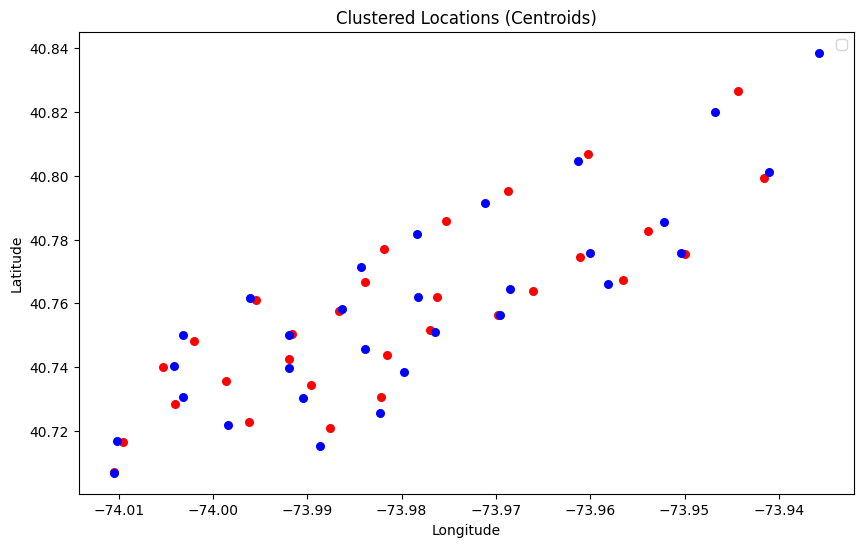

In [9]:
# Display information or perform further analysis on each location as needed
centroids_dropoff = kmeans_dropoff.cluster_centers_

# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))
plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=30, c='red')
plt.scatter(centroids_dropoff[:, 0], centroids_dropoff[:, 1], marker='o', s=30, c='blue')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

Unifying clusters that are very close to each other

In [10]:
#Create arrays to store pickups
picked_up_pickup_indices = []
picked_up_dropoff_indices = []
radius = 0.0024

# Create arrays to store pickups
picked_up_indices = []
closest_pickup_indices = []  # Store indices of closest pickup point for each picked up dropoff centroid

# Iterate through each dropoff centroid
for dropoff_index, dropoff_centroid in enumerate(centroids_dropoff):
    # Assume initially it's a dropoff
    is_pickup = False
    closest_pickup_index = None  # Store the index of the closest pickup point
    min_distance = float('inf')  # Initialize minimum distance to infinity
    # Iterate through each pickup centroid
    for pickup_index, pickup_centroid in enumerate(centroids_pickpup):
        # Calculate the Euclidean distance between the centroids
        distance = np.linalg.norm(pickup_centroid - dropoff_centroid)
        # If the distance is within the radius to any pickup centroid, classify as pickup
        if distance <= radius:
            is_pickup = True
            if distance < min_distance:  # If this pickup is closer than the previous closest one
                min_distance = distance
                closest_pickup_index = pickup_index
    # If it's within the radius of any pickup, classify as pickup, else keep it as a dropoff
    if is_pickup:
        picked_up_indices.append(dropoff_index)
        closest_pickup_indices.append(closest_pickup_index)

# Convert to numpy array
picked_up_indices = np.array(picked_up_indices)
closest_pickup_indices = np.array(closest_pickup_indices)



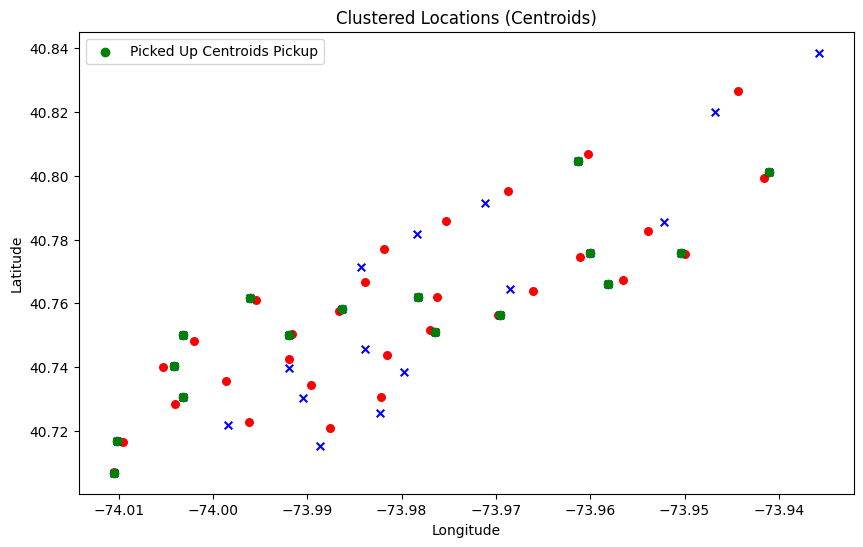

In [11]:
# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))

plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=30, c='red')
plt.scatter(centroids_dropoff[:, 0], centroids_dropoff[:, 1], marker='x', s=30, c='blue')
plt.scatter(centroids_dropoff[picked_up_indices, 0], 
            centroids_dropoff[picked_up_indices, 1], 
            color='green', label='Picked Up Centroids Pickup')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

Deleting dropff that are too close to pickpoints, they become the same

In [12]:
centroids_dropoff_filtered = np.delete(centroids_dropoff, picked_up_indices, axis=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


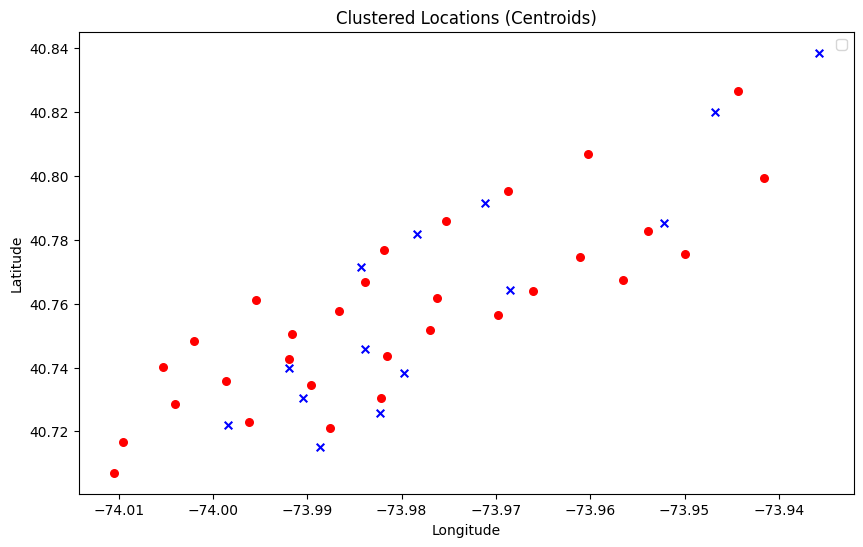

In [13]:
# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))

plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=30, c='red')
plt.scatter(centroids_dropoff_filtered[:,0], centroids_dropoff_filtered[:,1], marker='x', s=30, c='blue')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [14]:
picked_up_indices

array([ 0,  1,  3,  5,  6,  7,  8, 10, 15, 16, 20, 21, 22, 24, 27, 28])

In [15]:
closest_pickup_indices

array([13, 18,  8,  1, 22, 20,  7, 26, 25, 29, 23,  9, 12,  3,  5, 15])

In [16]:
for i, idx in enumerate(picked_up_indices):
    print(n_clusters+idx, closest_pickup_indices[i])
    #print(centroids_dropoff[idx])
    df.loc[df['location_dropoff'] == idx + n_clusters, 'location_dropoff'] = closest_pickup_indices[i]

30 13
31 18
33 8
35 1
36 22
37 20
38 7
40 26
45 25
46 29
50 23
51 9
52 12
54 3
57 5
58 15


In [17]:
np.unique(df['location_dropoff'])

array([ 1,  3,  5,  7,  8,  9, 12, 13, 15, 18, 20, 22, 23, 25, 26, 29, 32,
       34, 39, 41, 42, 43, 44, 47, 48, 49, 53, 55, 56, 59], dtype=int32)

In [18]:
df.to_csv("dataset/filtered_train_14_15_w_location.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


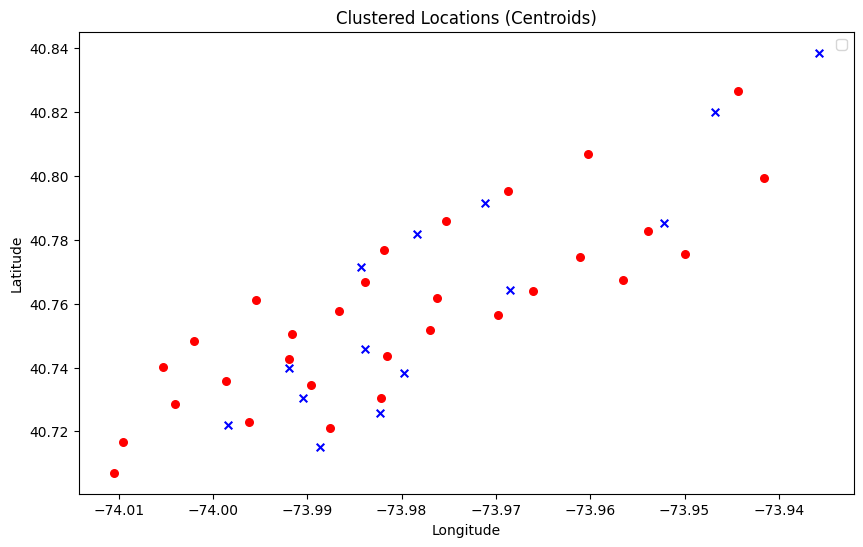

In [19]:
# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))

plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=30, c='red')
plt.scatter(centroids_dropoff_filtered[:,0], centroids_dropoff_filtered[:,1], marker='x', s=30, c='blue')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [20]:
total_points = np.concatenate([centroids_pickpup, centroids_dropoff_filtered])

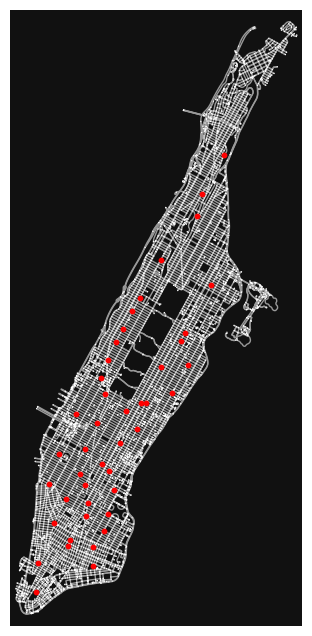

In [21]:
import osmnx as ox

# Retrieve the street network for Manhattan
graph_vanilla = ox.graph_from_place("Manhattan, New York, USA", network_type="drive_service")
fig, ax = ox.plot_graph(graph_vanilla, node_size=1, show=False, close=False)
for longitude, latitude in total_points:
    # Find the nearest node in the graph to the specified coordinates
    nearest_node = ox.distance.nearest_nodes(graph_vanilla, longitude, latitude)
    ax.scatter(graph_vanilla.nodes[nearest_node]['x'], graph_vanilla.nodes[nearest_node]['y'], color='r', s=10)
plt.show()

Simplifying the graph. Only important roads

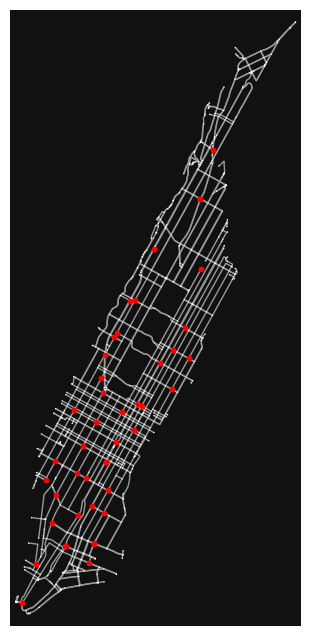

In [22]:

# Retrieve the street network for Manhattan, but simplified
graph = ox.graph_from_place("Manhattan, New York, USA", network_type="drive_service", custom_filter='["highway"~"primary|secondary"]')
fig, ax = ox.plot_graph(graph, node_size=1, show=False, close=False)
for longitude, latitude in total_points:
    # Find the nearest node in the graph to the specified coordinates
    nearest_node = ox.distance.nearest_nodes(graph, longitude, latitude)
    ax.scatter(graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color='r', s=10)
plt.show()


In [23]:
# Iterate over each point and find the nearest node in the graph
nearest_nodes = []
for latitude, longitude in total_points:
    nearest_node = ox.distance.nearest_nodes(graph, latitude, longitude)
    nearest_nodes.append(nearest_node)



# Initialize a list to store the routes
routes = []

# Calculate the routes between consecutive pairs of nearest nodes
for i in range(len(nearest_nodes) - 1):
    start_node = nearest_nodes[i]
    end_node = nearest_nodes[i + 1]
    route = ox.shortest_path(graph, start_node, end_node)
    routes.append(route)


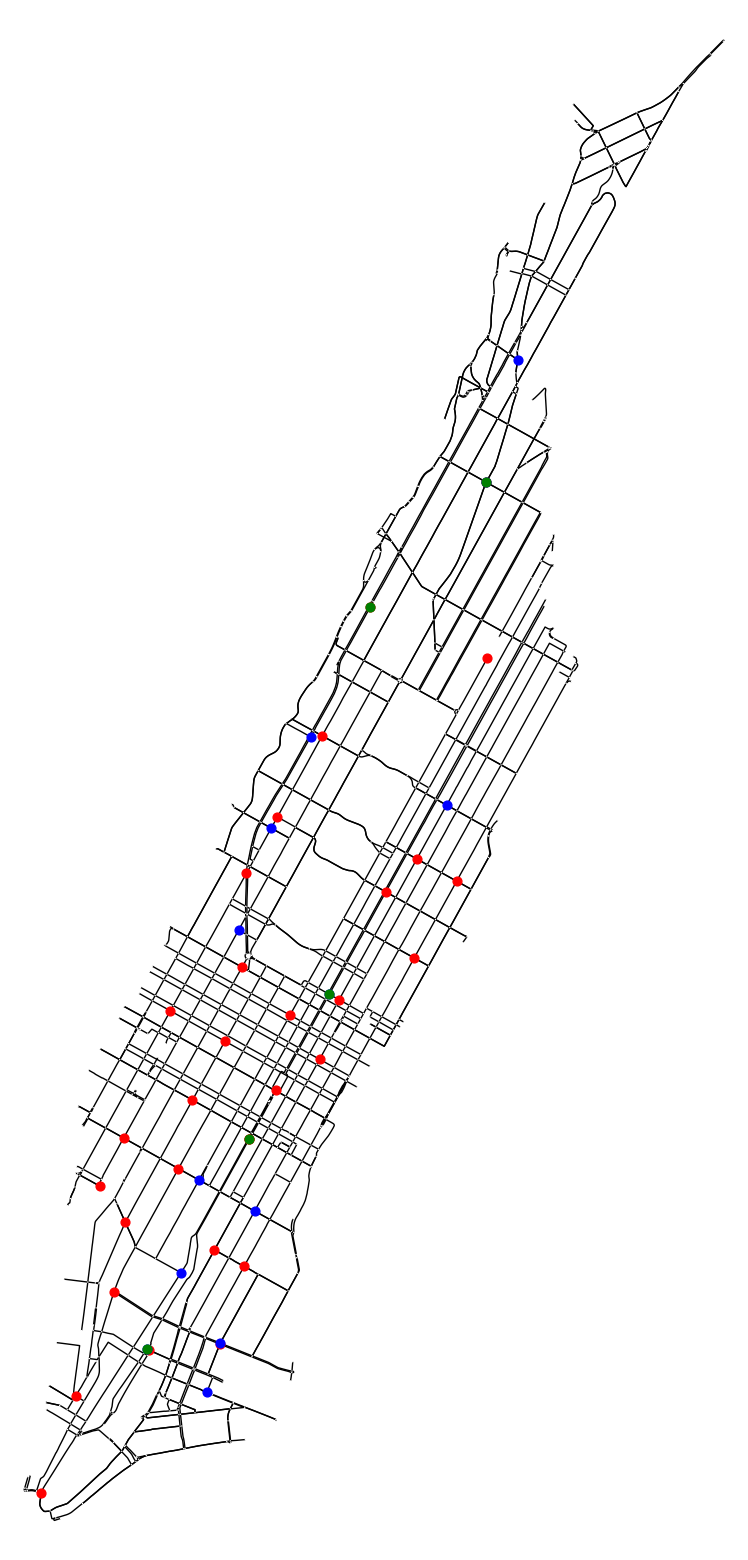

In [24]:
# Plot the street network with the calculated routes
fig, ax = ox.plot_graph(graph, node_size=1, show=False, close=False, figsize=(20,20), dpi=300,bgcolor='white', edge_color='black', save=True, filepath='image.png')
color = 'r'
for idx,(longitude, latitude) in enumerate(total_points):
    if idx >len(centroids_pickpup):
        color = 'b'
    # Find the nearest node in the graph to the specified coordinates
    nearest_node = ox.distance.nearest_nodes(graph, longitude, latitude)
    ax.scatter(graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color=color, s=40, alpha = 1)

# Extract latitude and longitude coordinates
latitudes = [point[1] for point in total_points]
longitudes = [point[0] for point in total_points]

# Find the range of latitude and longitude coordinates
lat_min, lat_max = min(latitudes), max(latitudes)
lon_min, lon_max = min(longitudes), max(longitudes)

# Divide the latitude and longitude range into 5 segments
lat_segments = np.linspace(lat_min, lat_max, num=6)
lon_segments = np.linspace(lon_min, lon_max, num=6)

# Find the middle point within each segment
contracted_points = []
for i in range(5):
    lat_middle = (lat_segments[i] + lat_segments[i+1]) / 2
    
    lon_middle = (lon_segments[i] + lon_segments[i+1]) / 2
    # Find the closest original point to this middle point
    closest_point_idx = np.argmin(np.linalg.norm(np.array(total_points) - [lon_middle, lat_middle], axis=1))
    closest_point = total_points[closest_point_idx]
    contracted_points.append(closest_point)
depots = []
for idx,(longitude, latitude) in enumerate(contracted_points):
    # Find the nearest node in the graph to the specified coordinates
    nearest_node = ox.distance.nearest_nodes(graph, longitude, latitude)
    depots += [nearest_node]
    ax.scatter(graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color="g", s=40, alpha = 1)


#fig.dpi = 300
#fig.set_figheight(20)
#fig.set_figwidth(20)
fig.savefig("a_vanilla.png",dpi=300, bbox_inches='tight')
#fig.show()

In [25]:
real_locations = []
# Iterate over each point and find the nearest node in the graph
for latitude, longitude in  sorted(list(total_points)+list(contracted_points), key=lambda point: point[1]):
    nearest_node = ox.distance.nearest_nodes(graph, latitude, longitude)
    real_locations.append(nearest_node)

In [26]:
sorted_nodes = real_locations
len(sorted_nodes)  

49

In [27]:
import math
import networkx as nx

def euclidean_distance(node1, node2):
    return math.sqrt((node1['x'] - node2['x'])**2 + (node1['y'] - node2['y'])**2)

def sort_nodes_by_distance(graph,nodes):
    # Create a graph
    G = nx.Graph()
    
    # Add nodes to the graph
    for i, node in enumerate(nodes):
        G.add_node(i, node=node)
    
    # Calculate distances and add edges to the graph
    num_nodes = len(nodes)
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            dist = euclidean_distance(graph.nodes[nodes[i]], graph.nodes[nodes[j]])
            G.add_edge(i, j, weight=dist)
    
    # Initialize an empty list to store the sorted nodes
    sorted_nodes = []
    
    # Sort nodes based on the closest neighbor
    for i in range(num_nodes):
        visited = set()
        closest_node = None
        min_distance = float('inf')
        
        # DFS traversal to find the closest node
        stack = [(i, 0)]
        while stack:
            node, distance = stack.pop()
            if node in visited:
                continue
            visited.add(node)
            if distance < min_distance:
                closest_node = node
                min_distance = distance
            for neighbor in G.neighbors(node):
                stack.append((neighbor, distance + G[node][neighbor]['weight']))
        
        # Append the closest node to the sorted list
        sorted_nodes.append(closest_node)
    
    return sorted_nodes


sorted_nodes_indices = sort_nodes_by_distance(graph,real_locations)
sorted_nodes2 = [real_locations[i] for i in sorted_nodes_indices]
print("Sorted nodes by Euclidean distance:", sorted_nodes2)


Sorted nodes by Euclidean distance: [588546891, 42451593, 42445357, 9166033061, 42430044, 42430044, 42430041, 9166033062, 4321748238, 42428473, 42440743, 42440729, 42430828, 42442889, 42437881, 42436439, 42430271, 3786901738, 3786901738, 3786901738, 42437909, 42437654, 9140654137, 42449956, 42428297, 42432706, 42450426, 42447020, 6177439750, 6177439750, 42435714, 42436492, 1241742563, 42459137, 42429342, 9177424867, 42442463, 42429334, 42447166, 42442469, 1061531593, 42442534, 42429552, 6223571524, 6223571524, 42432963, 42432963, 42432963, 42433027]


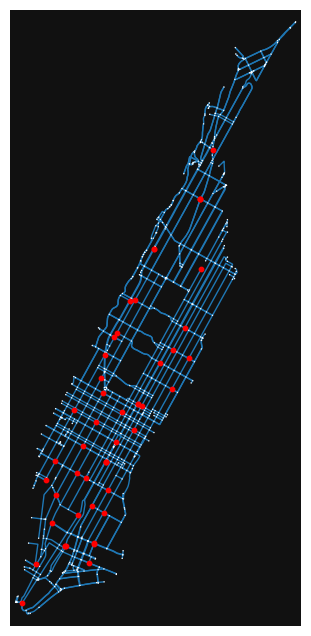

In [28]:
fig, ax = ox.plot_graph(graph, node_size=1, show=False, close=False, edge_color=None)
for nearest_node in sorted_nodes:
    ax.scatter(graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color='r', s=10)
plt.show()


In [29]:
relevant_roads = []
for i,(u, v, data) in enumerate(graph.edges(data=True)):
    if (u in real_locations or v in real_locations) and'name' in data.keys():
        relevant_roads += [data["name"]]


In [30]:
intersection_nodes = [node for node, degree in dict(graph.degree()).items() if degree > 2 and graph.nodes[node]["y"] <= graph.nodes[real_locations[-1]]["y"]]
len(intersection_nodes)

702

In [31]:
filtered_in = []
for i,(u, v, data) in enumerate(graph.edges(data=True)):
    if "name" in data.keys() and (data["name"]) not in relevant_roads:
        if u in intersection_nodes and (u not in filtered_in):
            filtered_in += [u]
        if  v in intersection_nodes and(v not in filtered_in):
            filtered_in += [v]


In [32]:
import random
def randomly_select_points(filtered_in, x):
    # Ensure x is not greater than the total number of points
    x = min(x, len(filtered_in))
    # Randomly select x points from filtered_in
    selected_points = random.sample(filtered_in, x)
    return selected_points

In [33]:
x = 100  # Number of points to randomly select
selected_points = randomly_select_points(filtered_in, x)
print(selected_points)

[42438891, 593300940, 42430126, 595703226, 7106818626, 761293078, 42427086, 596775946, 5004570630, 561035343, 5004570651, 42434845, 42441947, 7076060068, 42430633, 1773084402, 42427324, 42435646, 42428037, 42423295, 3914862593, 561035374, 1773055865, 358448394, 42455643, 42434072, 42448162, 371337241, 589927943, 42434962, 42435805, 42450456, 42441276, 7491182059, 1825841655, 42445018, 4347534767, 42432825, 596775840, 42452973, 1825841742, 561042192, 42437612, 42430607, 42440153, 42432985, 4477147270, 7802856352, 1061531603, 42434249, 42437589, 42441263, 42448469, 42430237, 42440577, 42441104, 42446942, 42445387, 5333189422, 42441949, 589927993, 42434085, 486868830, 6330018917, 42442664, 42428391, 2711029280, 3247295579, 5378686574, 42445972, 7480301986, 42444456, 11252642361, 8262936586, 42432847, 596775979, 42452290, 42421745, 42444123, 7641820943, 42445378, 42445365, 42441191, 3884569931, 6207264908, 42438889, 7280430895, 2141026498, 42437988, 42443264, 42431293, 6680686985, 42449127

In [34]:
def remove_non_f_nodes(graph, f):
        # Create a copy of the graph to work with
    graph_copy = graph.copy()
    
    # List edges that need to be removed
    #edges_to_remove = []
    #for edge in graph_copy.edges():
    #    if edge[0] not in f or edge[1] not in f:
    #        edges_to_remove.append(edge)
    
    # Remove edges
    #graph_copy.remove_edges_from(edges_to_remove)
    
    return  graph_copy.subgraph(f)



# Call the function to remove non-'f' nodes
updated_graph = remove_non_f_nodes(graph, intersection_nodes+real_locations)



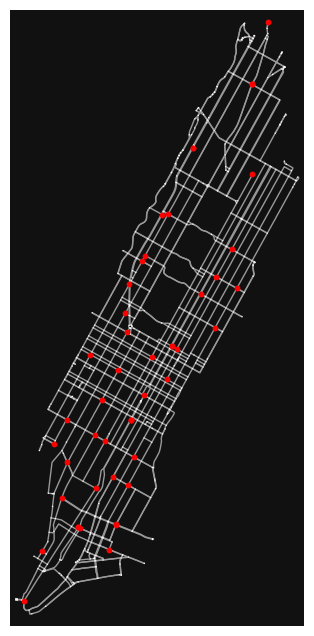

In [37]:
# Plot the filtered graph
fig, ax = ox.plot_graph(updated_graph, node_size=1, show=False, close=False)

# Plot the red nodes
for nearest_node in real_locations:
    color = "b"
    if nearest_node in real_locations:
        color = "r"
    ax.scatter(updated_graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color=color, s=10)

plt.show()

In [ ]:
nodes, edges = ox.graph_to_gdfs(updated_graph)

nodes.head(5)

,y,x,highway,street_count,ref,geometry
osmid,,,,,,
42421728,40.798048,-73.960044,traffic_signals,3,NaN,POINT (-73.96004 40.79805)
42421737,40.799244,-73.962873,traffic_signals,4,NaN,POINT (-73.96287 40.79924)
42421741,40.800429,-73.965691,traffic_signals,4,NaN,POINT (-73.96569 40.80043)
42421745,40.801398,-73.967996,traffic_signals,4,NaN,POINT (-73.96800 40.80140)
42421951,40.703326,-74.007775,traffic_signals,2,NaN,POINT (-74.00777 40.70333)


In [ ]:
edges.head(5)

osmid  \
u        v        key                                                      
42421728 42435346 0          [195743153, 990219223, 439801898, 68674967]   
         42425232 0                                            195743153   
         42421737 0    [195743201, 420625570, 420625573, 5668966, 420...   
42421737 42421728 0    [195743201, 420625570, 420625573, 5668966, 420...   
         42443381 0    [421853637, 1052940920, 420623117, 420625560, ...   

                                    name    highway maxspeed  oneway reversed  \
u        v        key                                                           
42421728 42435346 0    Central Park West  secondary   25 mph   False    False   
         42425232 0    Central Park West  secondary   25 mph   False     True   
         42421737 0    West 106th Street  secondary      NaN   False    False   
42421737 42421728 0    West 106th Street  secondary      NaN   False     True   
         42443381 0      Columbus Avenue    primary   25 mph    True    False   

                        length   lanes  \
u        v        key                    
42421728 42435346 0    295.537       4   
         42425232 0    720.182     NaN   
         42421737 0    272.804     NaN   
42421737 42421728 0    272.804     NaN   
         42443381 0    809.976  [3, 4]   

                                                                geometry  \
u        v        key                                                      
42421728 42435346 0    LINESTRING (-73.96004 40.79805, -73.95996 40.7...   
         42425232 0    LINESTRING (-73.96004 40.79805, -73.96011 40.7...   
         42421737 0    LINESTRING (-73.96004 40.79805, -73.96017 40.7...   
42421737 42421728 0    LINESTRING (-73.96287 40.79924, -73.96275 40.7...   
         42443381 0    LINESTRING (-73.96287 40.79924, -73.96294 40.7...   

                      width bridge tunnel access junction  ref  
u        v        key                                           
42421728 42435346 0     NaN    NaN    NaN    NaN      NaN  NaN  
         42425232 0     NaN    NaN    NaN    NaN      NaN  NaN  
         42421737 0     NaN    NaN    NaN    NaN      NaN  NaN  
42421737 42421728 0     NaN    NaN    NaN    NaN      NaN  NaN  
         42443381 0     NaN    NaN    NaN    NaN      NaN  NaN

In [ ]:
updated_graph
print(edges['highway'].value_counts())

highway
secondary                    861
primary                      589
secondary_link                33
primary_link                  16
[secondary, primary]           6
[primary_link, primary]        2
[primary_link, secondary]      1
Name: count, dtype: int64


In [ ]:
#Create arrays to store pickups
remove_indexes = []
radius = 0.006

# Iterate through each dropoff centroid
for idx, point in enumerate(selected_points):
    which_to_remove = []
    min_distance = float('inf')  
    for i in range(idx+1, len(selected_points)):
        candidate_point = updated_graph.nodes[selected_points[i]]
        distance = np.linalg.norm( np.array([updated_graph.nodes[point]['x'], graph.nodes[point]['y']])
             - np.array([candidate_point['x'], candidate_point['y']]))
        # If the distance is within the radius to any pickup centroid, classify as pickup
        if distance <= radius:
            which_to_remove += [i]
    remove_indexes += which_to_remove

for _, point in enumerate(nearest_nodes2):
    which_to_remove = []
    for i in range(len(selected_points)):
        candidate_point = updated_graph.nodes[selected_points[i]]
        distance = np.linalg.norm( np.array([updated_graph.nodes[point]['x'], graph.nodes[point]['y']])
             - np.array([candidate_point['x'], candidate_point['y']]))
        # If the distance is within the radius to any pickup centroid, classify as pickup
        if distance <= radius:
            which_to_remove += [i]
    remove_indexes += which_to_remove


In [ ]:
test = list(np.delete(selected_points, remove_indexes, axis=0))

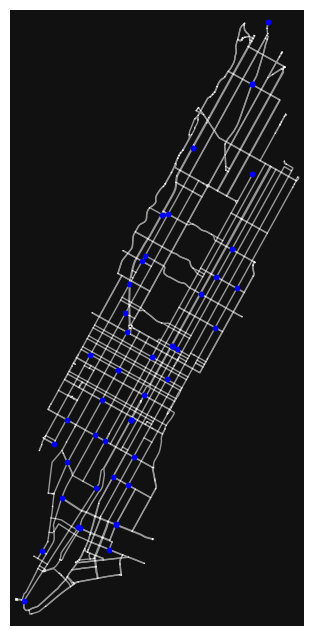

In [ ]:
# Plot the filtered graph
fig, ax = ox.plot_graph(updated_graph, node_size=1, show=False, close=False)

# Plot the red nodes
for nearest_node in nearest_nodes2:
    color = "b"
    ax.scatter(updated_graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color=color, s=10)

plt.show()

In [ ]:
nearest_nodes2 = list(set(nearest_nodes2))

In [ ]:
nodes, edges = ox.graph_to_gdfs(updated_graph)
test_df = edges.copy()

In [ ]:
selected_node = nearest_nodes2[0]

In [ ]:
selected_node

42459137

In [ ]:
routes=[]
from tqdm.notebook import tqdm
for selected_node in tqdm(nearest_nodes2):
    min_route = [1]*200000
    not_done_nodes = []
    for n in nearest_nodes2:
        if n == selected_node:
            continue
        route = ox.routing.shortest_path(updated_graph, selected_node, n, weight='length', cpus=1)
        if route is None:
            if n not in not_done_nodes:
                not_done_nodes+=[n]
            print(n, route)
            continue
        routes += [route]

  0%|          | 0/42 [00:00<?, ?it/s]

42433027 None
42429552 None
42433027 None
42429552 None
42429552 None
42433027 None
42429552 None
42433027 None
42429552 None
42433027 None
42429552 None
42433027 None
42429552 None
42433027 None
42429552 None
42433027 None
42429552 None
42433027 None
42429552 None
42433027 None
42429552 None
42433027 None
42429552 None
42433027 None
42429552 None
42433027 None
42429552 None
42433027 None
42429552 None
42433027 None
42429552 None
42433027 None
42429552 None
42433027 None
42429552 None
42433027 None
42429552 None
42433027 None
42429552 None
42459137 None
42435714 None
42433027 None
6177439750 None
42451593 None
42442889 None
42428297 None
42436492 None
4321748238 None
42437909 None
42437654 None
42429334 None
42440729 None
42429342 None
42449956 None
9166033061 None
9166033062 None
42440743 None
42442534 None
42447020 None
42428473 None
9140654137 None
42447166 None
42430271 None
42432706 None
42432963 None
6223571524 None
1061531593 None
588546891 None
42436439 None
42430041 None
42430

In [ ]:
not_done_nodes

[42433027, 42429552]

In [ ]:
fig, ax = ox.plot_graph(updated_graph, node_size=1, show=False, close=False)

# Plot the red nodes
for nearest_node in nearest_nodes2[:6]:
    color = "b"
    ax.scatter(updated_graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color=color, s=10)
plt.close()
fig, ax = ox.plot_graph_routes(updated_graph, routes, route_colors='green', route_linewidth=1, node_size=1, figsize=(5,5), dpi=300,bgcolor='white', edge_color='black', save=True, filepath='t2.png', node_color = "r", ax = ax, show = True)
ax.clear()

plt.show()

KeyboardInterrupt: 

Now that we have nodes that can not be connected to others, we just fake edges in the normal graph

In [ ]:
routes = sorted(routes, key=lambda x: len(x), reverse=True)

In [ ]:
seen = set()
unique_routes = []

for route in routes:
    # Convert the route list to a tuple so it's hashable
    route_tuple = tuple(route)
    if route_tuple not in seen:
        unique_routes.append(route)
        seen.add(route_tuple)

routes = unique_routes


In [ ]:


new_routes_alt = [route for route_idx, route in enumerate(routes) if not any(set(route).issubset(set(other)) for other in routes[:route_idx] + routes[route_idx + 1:])]
new_routes_alt = sorted(new_routes_alt, key=lambda x: len(x), reverse=True)
print(len(new_routes_alt))


658


In [ ]:
def save_list_of_lists_to_txt(list_of_lists, filename):
    with open(filename, 'w') as f:
        for sublist in list_of_lists:
            line = ' '.join(map(str, sublist)) + '\n'
            f.write(line)

filename = 'list_of_lists.txt'

# Save the list of lists to a text file
save_list_of_lists_to_txt(new_routes_alt, filename)

In [ ]:
for a in new_routes_alt:
    if [42429334, 42429330] in a:
        print(a)

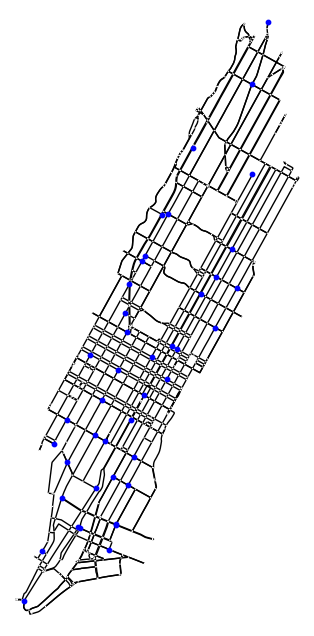

In [ ]:
plt.close()# Plot the filtered graph
fig, ax = ox.plot_graph(updated_graph, node_size=1, show=False, close=False,bgcolor='white', edge_color='black')

# Plot the red nodes
for nearest_node in nearest_nodes2:
    color = "b"
    ax.scatter(updated_graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color=color, s=10)

plt.show()
fig, ax = ox.plot_graph_routes(updated_graph, new_routes_alt, route_colors='blue',route_alpha=0.1, route_linewidth=0, node_size=1, figsize=(5,5), dpi=300,bgcolor='white', edge_color='black', save=True, filepath='t3.png', node_color = "r", ax = ax, show = True)
#fig, ax = ox.plot_graph_routes(updated_graph, new_routes[4:9], route_colors='blue', route_linewidth=0, node_size=1, figsize=(5,5), dpi=300,bgcolor='white', edge_color='black', save=True, filepath='t3.png', node_color = "r", ax = ax, show = True)
#fig, ax = ox.plot_graph_routes(updated_graph, new_routes[9:15], route_colors='red', route_linewidth=0, node_size=1, figsize=(5,5), dpi=300,bgcolor='white', edge_color='black', save=True, filepath='t3.png', node_color = "r", ax = ax, show = True)
ax.clear()

In [ ]:
graph_from_route = nx.Graph()
for route in new_routes_alt:
    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        graph_from_route.add_edge(node1, node2)




In [ ]:
# Compute minimum spanning tree
mst = nx.minimum_spanning_tree(graph_from_route)

In [ ]:
mst.edges()

EdgeView([(42433027, 42433020), (42433020, 42433014), (42433014, 42442671), (42442671, 42442664), (42442664, 42432999), (42442664, 42442651), (42432999, 42432985), (42432985, 42432963), (42432963, 42432929), (42432963, 42434262), (42432929, 7732243558), (7732243558, 6431058183), (6431058183, 42432897), (6431058183, 42435736), (42432897, 42439851), (42432897, 42432894), (42439851, 42439849), (42439849, 42433743), (42439849, 2141026498), (42433743, 2141026499), (42433743, 4016646214), (2141026499, 3099327964), (3099327964, 42426374), (42426374, 595703226), (595703226, 42432395), (595703226, 42432352), (42432395, 42450456), (42450456, 42443264), (42450456, 42446138), (42443264, 42443268), (42443264, 42446093), (42443264, 42443263), (42443268, 42429314), (42443268, 42446086), (42429314, 42449187), (42429314, 42429324), (42449187, 42435497), (42449187, 42433927), (42435497, 42440397), (42435497, 42435499), (42440397, 42436475), (42440397, 42446021), (42440397, 42427915), (42436475, 42447228

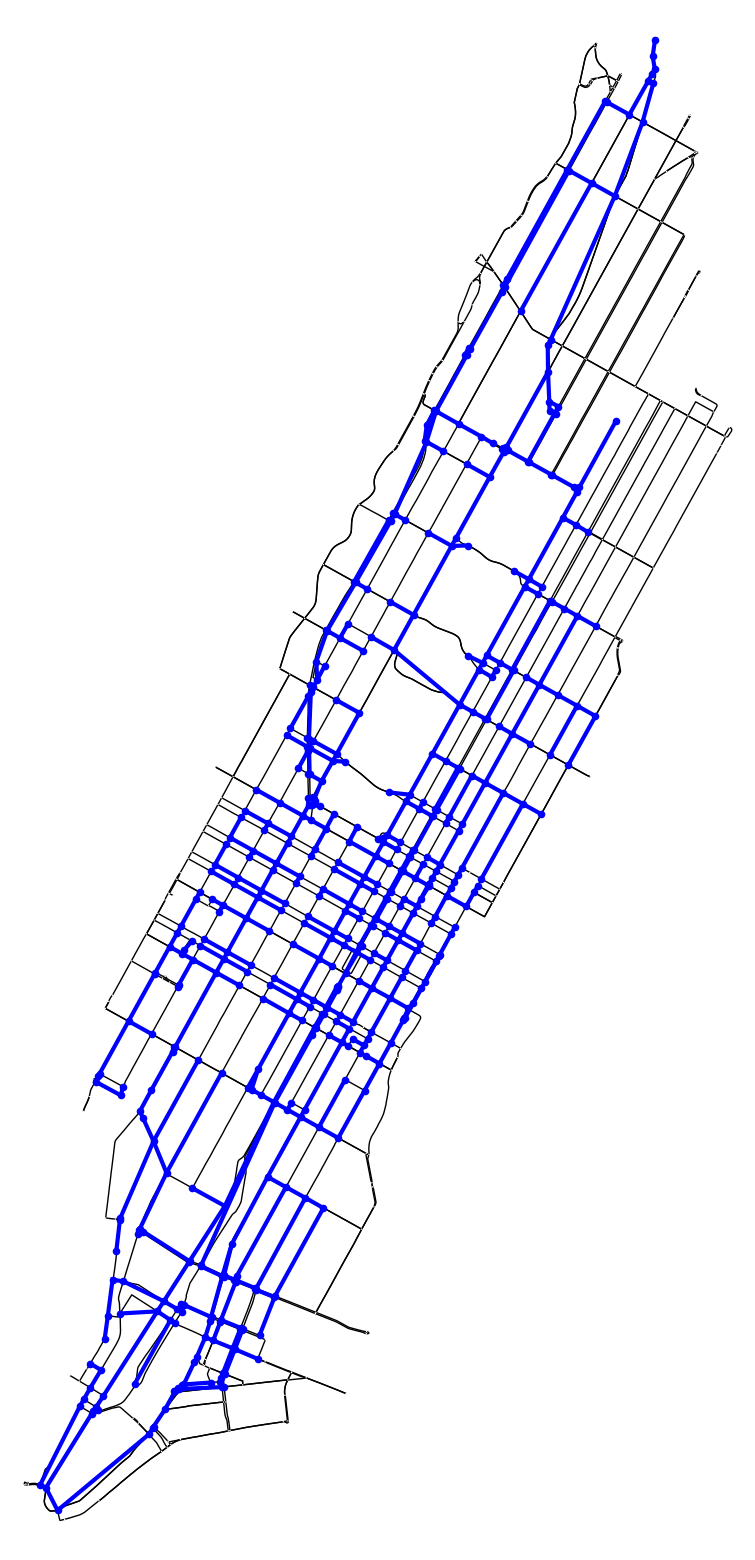

In [ ]:
plt.close()# Plot the filtered graph
fig, ax = ox.plot_graph(updated_graph, node_size=1, show=False, close=False,bgcolor='white', edge_color='black', figsize=(20, 20))
# Plot the red nodes
for edge in mst.edges():
    node1, node2 = edge
    # Get node coordinates
    x1, y1 = updated_graph.nodes[node1]['x'], updated_graph.nodes[node1]['y']
    x2, y2 = updated_graph.nodes[node2]['x'], updated_graph.nodes[node2]['y']
    # Plot edge
    ax.plot([x1, x2], [y1, y2], color='blue', linewidth=3)  # You can adjust color and linewidth as needed


for nearest_node in mst.nodes():
    color = "b"
    ax.scatter(updated_graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color=color, s=20)



plt.savefig('t4.png', dpi=300, bbox_inches='tight')

plt.show()
ax.clear()

In [ ]:
len(updated_graph.subgraph(test+nearest_nodes2).nodes)

100

In [ ]:
plt.close()
#fig, ax = ox.plot_graph_routes(graph, routes2, route_colors='orange', route_linewidth=1, node_size=1, figsize=(5,5), dpi=300,bgcolor='white', edge_color='black', save=True, filepath='image_roads.png', node_color = "r", ax = ax, show = True)

In [ ]:
for i, node in enumerate(mst.nodes()):
    mst.nodes[node]['id'] = i
    if node in depots:
        mst.nodes[node]['depot'] = True
    else:
        mst.nodes[node]['depot'] = False
    print(node)

42433027
42433020
42433014
42442671
42442664
42432999
42432985
42432963
42432929
7732243558
6431058183
42432897
42439851
42439849
42433743
2141026499
3099327964
42426374
595703226
42432395
42450456
42443264
42443268
42429314
42449187
42435497
42440397
42436475
42447228
42455662
4347534783
5706568771
42432818
42450426
42436700
42440153
42432580
42434072
42432693
42437358
42443950
42452973
42437644
7372860100
42428201
42445867
4597668041
42448693
42446925
42448701
42440729
1773084402
42437612
1918039864
42429752
1773076513
42437589
42452067
42437996
42437962
42451593
42428473
42428447
1919595915
42428438
42428436
2821304137
272195270
8262936580
42428391
588546891
42430041
42430044
42442889
42440737
42440743
42439006
9166033062
9166033061
42429754
486869282
1773076511
1918039904
1773082410
42445511
4202908174
4321748237
42430237
42430828
42429378
42432214
4205565514
4205565533
42435624
42435644
42435646
42435650
42435663
42432700
42435675
42432589
42435684
42435705
42435707
42435714
18258

In [ ]:
for i, data in mst.nodes(data=True):
    print(i, data)

42433027 {'id': 0, 'depot': False}
42433020 {'id': 1, 'depot': False}
42433014 {'id': 2, 'depot': False}
42442671 {'id': 3, 'depot': False}
42442664 {'id': 4, 'depot': False}
42432999 {'id': 5, 'depot': False}
42432985 {'id': 6, 'depot': False}
42432963 {'id': 7, 'depot': True}
42432929 {'id': 8, 'depot': False}
7732243558 {'id': 9, 'depot': False}
6431058183 {'id': 10, 'depot': False}
42432897 {'id': 11, 'depot': False}
42439851 {'id': 12, 'depot': False}
42439849 {'id': 13, 'depot': False}
42433743 {'id': 14, 'depot': False}
2141026499 {'id': 15, 'depot': False}
3099327964 {'id': 16, 'depot': False}
42426374 {'id': 17, 'depot': False}
595703226 {'id': 18, 'depot': False}
42432395 {'id': 19, 'depot': False}
42450456 {'id': 20, 'depot': False}
42443264 {'id': 21, 'depot': False}
42443268 {'id': 22, 'depot': False}
42429314 {'id': 23, 'depot': False}
42449187 {'id': 24, 'depot': False}
42435497 {'id': 25, 'depot': False}
42440397 {'id': 26, 'depot': False}
42436475 {'id': 27, 'depot': F

In [ ]:
import pickle
with open("graph_from_routes_wd", "wb") as f:
    pickle.dump(mst, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
pp_to_nn = {}
dp_to_nn = {}
a = []
for idx,point in enumerate(total_points):
    index = np.where(np.all(centroids_pickpup == point, axis=1))[0]
    if len(index)==0:
        index = np.where(np.all(centroids_dropoff == point, axis=1))[0]
        dp_to_nn[index[0] + n_clusters] = nearest_nodes[idx]
    else:
        pp_to_nn[index[0]] = nearest_nodes[idx]

In [ ]:
pp_to_nn.items()

dict_items([(0, 42430041), (1, 42449956), (2, 42429334), (3, 42428297), (4, 9177424867), (5, 42436439), (6, 42440729), (7, 588546891), (8, 6223571524), (9, 42436492), (10, 42442469), (11, 42435714), (12, 9140654137), (13, 42459137), (14, 42440743), (15, 42445357), (16, 42442534), (17, 42430271), (18, 4321748238), (19, 3786901738), (20, 42450426), (21, 42447020), (22, 42429552), (23, 42429342), (24, 42430828), (25, 42432706), (26, 42437909), (27, 9166033061), (28, 42432963), (29, 42437654)])

In [ ]:
dp_to_nn.items()

dict_items([(32, 3786901738), (34, 42442463), (39, 42442889), (41, 42433027), (42, 9166033062), (43, 42447166), (44, 1061531593), (47, 42430044), (48, 42428473), (49, 42432963), (53, 42437881), (55, 42451593), (56, 6177439750), (59, 1241742563)])

In [ ]:
dict_ = pp_to_nn.copy()
dict_.update(dp_to_nn)


In [ ]:
df["pickup_graph_node"] = df["location_pickup"].map(dict_)
df["dropoff_graph_node"] = df["location_dropoff"].map(dict_)

In [ ]:
df.isna().sum()

Unnamed: 0            0
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_date           0
location_pickup       0
location_dropoff      0
pickup_graph_node     0
dropoff_graph_node    0
dtype: int64

In [ ]:
df.to_csv("dataset/finished_dataset.csv")